## Import Relevent Packeges

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
sns.set()

## Load the data

In [2]:
raw_data = pd.read_csv(r"C:\Users\bssam\Downloads\Linear Regression Practical Example (Part 1) Dataset\1.04. Real-life example.csv")
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
raw_data['Model'].value_counts()

Model
E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
5            1
S5           1
21           1
Vista        1
Scion        1
Name: count, Length: 312, dtype: int64

## Delete coloumns with High unique values

In [100]:
data = raw_data.drop(['Model'],axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


## Delete Missing Values

In [101]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [102]:
data_no_mv = data.dropna(axis=0)
data_no_mv.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# Remove Outliers

## Price

<Axes: xlabel='Price', ylabel='Count'>

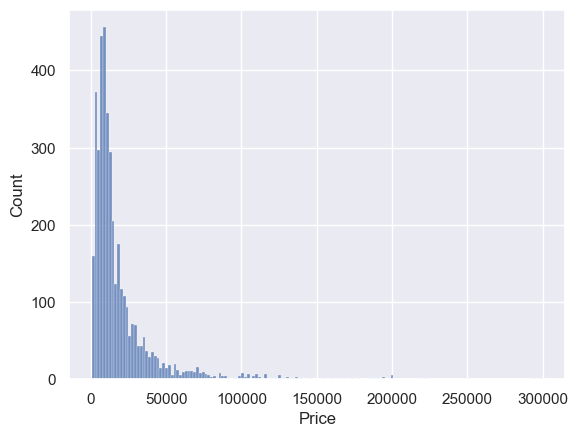

In [103]:
sns.histplot(data_no_mv['Price'])

In [104]:
outl_price1 = data_no_mv['Price'].mean() + (3*data_no_mv['Price'].std())
outl_price2 = data_no_mv['Price'].mean() - (3*data_no_mv['Price'].std())

data_1 = data_no_mv[data_no_mv['Price']<outl_price1]
data_1 = data_1[data_1['Price']>outl_price2]

<Axes: xlabel='Price', ylabel='Count'>

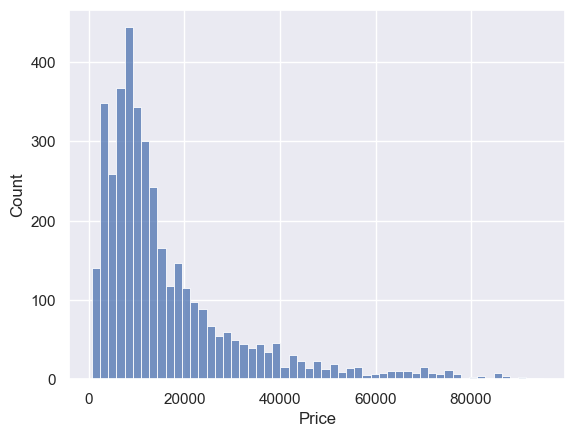

In [105]:
sns.histplot(data_1['Price'])

## Year

In [106]:
outl_year1 = data_no_mv['Year'].mean() + (3*data_no_mv['Year'].std())
outl_year2 = data_no_mv['Year'].mean() - (3*data_no_mv['Year'].std())

data_2 = data_1[data_1['Year']<outl_year1]
data_2 = data_2[data_2['Year']>outl_year2]

<Axes: xlabel='Year', ylabel='Count'>

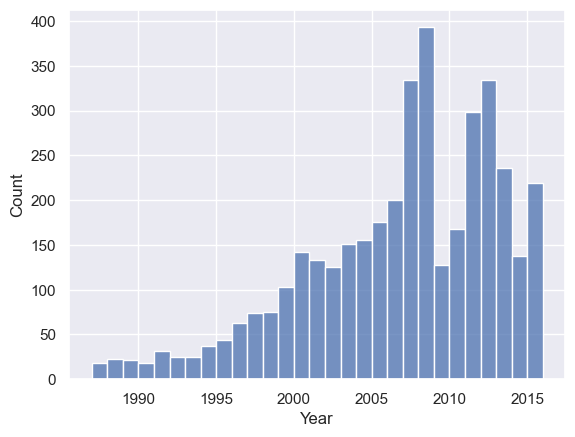

In [107]:
sns.histplot(data_2['Year'])

## EngineV

In [108]:
data_3 = data_2[data_2['EngineV']<6.5]
data_3 = data_3[data_3['EngineV']>0.6]

<Axes: xlabel='EngineV', ylabel='Count'>

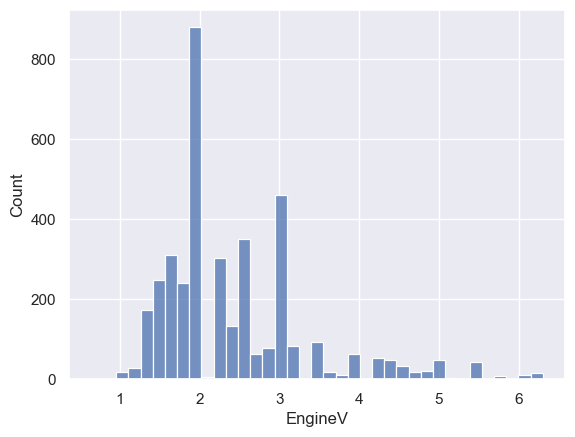

In [109]:
sns.histplot(data_3['EngineV'])

## Mileage

In [110]:
outl_mileage1 = data_no_mv['Mileage'].mean() + (3*data_no_mv['Mileage'].std())
outl_mileage2 = data_no_mv['Mileage'].mean() - (3*data_no_mv['Mileage'].std())

data_4 = data_3[data_3['Mileage']<outl_mileage1]
data_4 = data_4[data_4['Mileage']>outl_mileage2]

<Axes: xlabel='Mileage', ylabel='Count'>

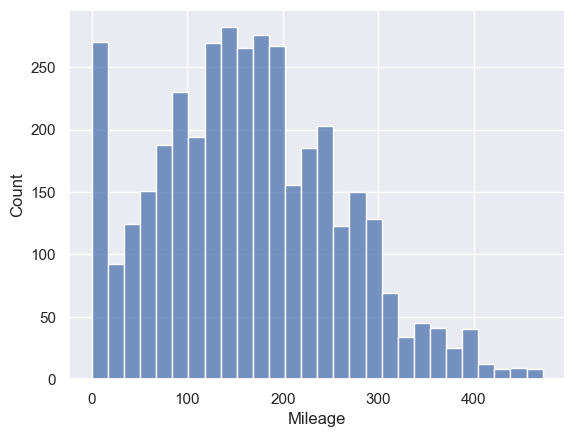

In [111]:
sns.histplot(data_4['Mileage'])

#
# Reset The Index

In [112]:
data_cleaned = data_4.reset_index(drop=True)

#
#

# Checking OLS Assumptions

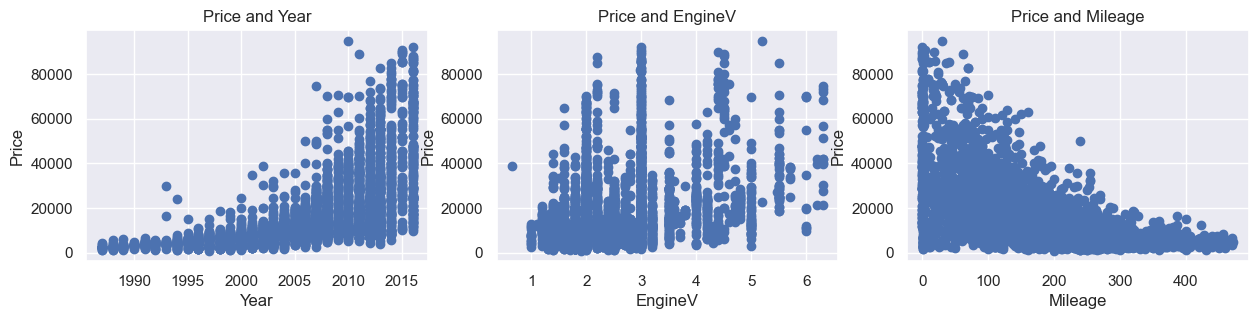

In [113]:
f,(fig1 , fig2 , fig3) = plt.subplots(1, 3, figsize = (15,3))


fig1.scatter(data_cleaned['Year'],data_cleaned['Price'])
fig1.set_title('Price and Year')
fig1.set_xlabel('Year')
fig1.set_ylabel('Price')



fig2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
fig2.set_title('Price and EngineV')
fig2.set_xlabel('EngineV')
fig2.set_ylabel('Price')



fig3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
fig3.set_title('Price and Mileage')
fig3.set_xlabel('Mileage')
fig3.set_ylabel('Price')

plt.show()

## Relax Price Values

In [114]:
data_cleaned['log_Price'] = np.log(data_cleaned['Price'])

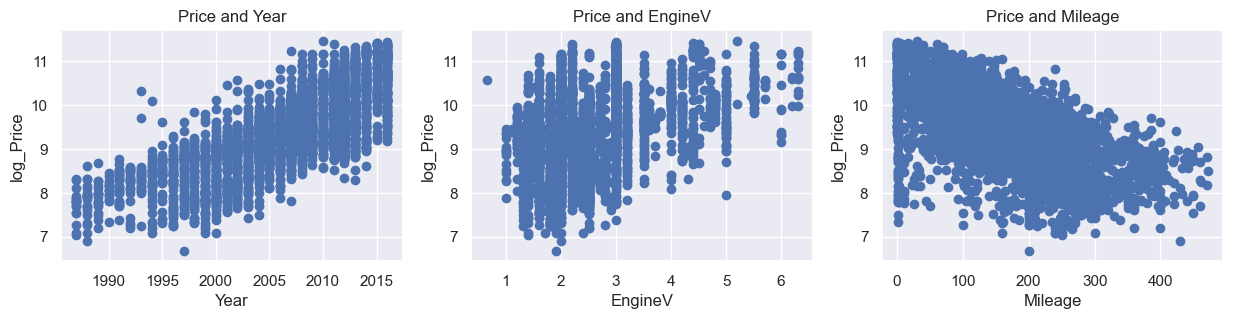

In [116]:
f,(fig1 , fig2 , fig3) = plt.subplots(1, 3, figsize = (15,3))


fig1.scatter(data_cleaned['Year'],data_cleaned['log_Price'])
fig1.set_title('Price and Year')
fig1.set_xlabel('Year')
fig1.set_ylabel('log_Price')



fig2.scatter(data_cleaned['EngineV'],data_cleaned['log_Price'])
fig2.set_title('Price and EngineV')
fig2.set_xlabel('EngineV')
fig2.set_ylabel('log_Price')



fig3.scatter(data_cleaned['Mileage'],data_cleaned['log_Price'])
fig3.set_title('Price and Mileage')
fig3.set_xlabel('Mileage')
fig3.set_ylabel('log_Price')

plt.show()

In [132]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

## Multicollinearity

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Year','EngineV','Mileage']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['Vif'] = [variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif

,Features,Vif
0,Year,10.294284
1,EngineV,7.678069
2,Mileage,3.891824


In [134]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [135]:
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3839,Renault,sedan,152,1.6,Petrol,yes,8.824678
3840,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3841,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3842,BMW,sedan,1,3.5,Petrol,yes,8.779557


## Creating Dummy Variables

In [144]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True , dtype=int)

In [145]:
data_with_dummies

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,152,1.6,8.824678,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3840,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3841,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3842,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Extra Mile

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_with_dummies[['log_Price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
        'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
        'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
        'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
        'Registration_yes']]
vif_dummies = pd.DataFrame()
vif_dummies['Features'] = variables.columns
vif_dummies['Vif'] = [variance_inflation_factor(variables.values , i) for i in range(variables.shape[1])]
vif_dummies

,Features,Vif
0,log_Price,41.901185
1,Mileage,4.552499
2,EngineV,13.392241
3,Brand_BMW,2.574588
4,Brand_Mercedes-Benz,2.956783
5,Brand_Mitsubishi,1.823043
6,Brand_Renault,2.285475
7,Brand_Toyota,2.378541
8,Brand_Volkswagen,3.315249
9,Body_hatch,1.612102


## Store our Data

In [148]:
data_preprocessed = data_with_dummies[['log_Price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
        'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
        'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
        'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
        'Registration_yes']]

In [149]:
data_preprocessed

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,8.824678,152,1.6,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3840,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3841,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3842,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Linear Regression Model

## Declare Targets and Inputs

In [154]:
target = data_preprocessed['log_Price']
inputs = data_preprocessed.drop(['log_Price'],axis=1)

## Scaling Inputs

In [156]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

## splite the data

In [165]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test  = train_test_split(inputs_scaled , target , test_size=0.2 , random_state=365)

## Perform our Regression

In [166]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Check our Model ( Scatter Plot )

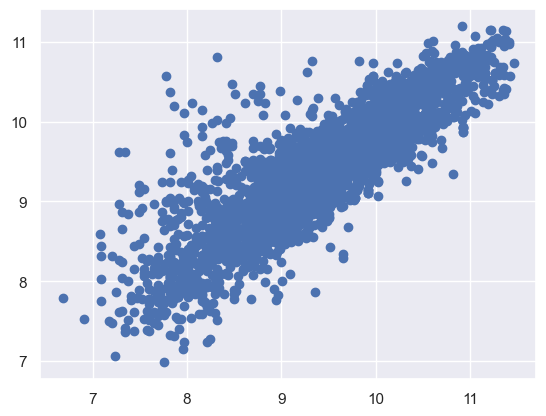

In [171]:
yhat = reg.predict(x_train)
plt.scatter(y_train,yhat)

## Check our Model ( Residuales )

C:\Users\bssam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


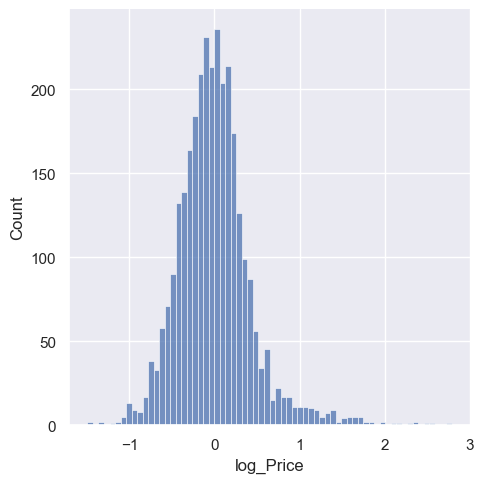

In [175]:
sns.displot(yhat - y_train)
plt.show()

## Features and weights

In [178]:
table = pd.DataFrame()
table['Features'] = inputs.columns
table['Weights'] = reg.coef_
table

,Features,Weights
0,Mileage,-0.430759
1,EngineV,0.202780
2,Brand_BMW,0.011515
3,Brand_Mercedes-Benz,-0.004897
4,Brand_Mitsubishi,-0.139747
5,Brand_Renault,-0.189476
6,Brand_Toyota,-0.057521
7,Brand_Volkswagen,-0.092326
8,Body_hatch,-0.150507
9,Body_other,-0.095124


## Testing

In [179]:
yhat_test = reg.predict(x_test)

In [191]:
test = pd.DataFrame()
test['Actual'] = np.exp(y_test)
test['Predictions'] = np.exp(yhat_test)
test['Residuales'] = np.exp(y_test) - np.exp(yhat_test)
test

,Actual,Predictions,Residuales
362,13893.75,17941.446616,-4047.696616
1627,19000.00,17646.223803,1353.776197
544,26500.00,28688.301482,-2188.301482
2310,11900.00,13724.776373,-1824.776373
3237,6400.00,7561.041185,-1161.041185
...,...,...,...
105,11990.00,5707.993286,6282.006714
76,8200.00,7358.936007,841.063993
22,24900.00,24977.812296,-77.812296
2724,8300.00,11865.525782,-3565.525782
